This project involves starting by webscraping a website containing each team of the Premier League and the details of the matches they have played. Subsequently, we will combine all this data to generate a pandas dataframe containing the details of each match of the current Premier League season. Finally, we will analyze these results.

#                                           WEBSCRAPING 
We will begin by creating a table that contains the URLs of each page containing information about one team. This will be achieved by webscraping the website fbref.com

In [47]:
import requests

In [48]:
url="https://fbref.com/fr/comps/9/Statistiques-Premier-League"

In [49]:
data=requests.get(url)

In [50]:
from bs4 import BeautifulSoup

In [51]:
soup=BeautifulSoup(data.text)

In [52]:
a=soup.select('table.stats_table')[0]

In [53]:
b=a.find_all('a')

In [54]:
l=[i.get("href") for i in b]

In [55]:
li=[i for i in l if '/fr/equipes/' in i]
li

['/fr/equipes/822bd0ba/Statistiques-Liverpool',
 '/fr/equipes/b8fd03ef/Statistiques-Manchester-City',
 '/fr/equipes/18bb7c10/Statistiques-Arsenal',
 '/fr/equipes/8602292d/Statistiques-Aston-Villa',
 '/fr/equipes/361ca564/Statistiques-Tottenham-Hotspur',
 '/fr/equipes/19538871/Statistiques-Manchester-United',
 '/fr/equipes/d07537b9/Statistiques-Brighton-and-Hove-Albion',
 '/fr/equipes/7c21e445/Statistiques-West-Ham-United',
 '/fr/equipes/8cec06e1/Statistiques-Wolverhampton-Wanderers',
 '/fr/equipes/b2b47a98/Statistiques-Newcastle-United',
 '/fr/equipes/cff3d9bb/Statistiques-Chelsea',
 '/fr/equipes/fd962109/Statistiques-Fulham',
 '/fr/equipes/47c64c55/Statistiques-Crystal-Palace',
 '/fr/equipes/4ba7cbea/Statistiques-Bournemouth',
 '/fr/equipes/d3fd31cc/Statistiques-Everton',
 '/fr/equipes/cd051869/Statistiques-Brentford',
 '/fr/equipes/e4a775cb/Statistiques-Nottingham-Forest',
 '/fr/equipes/e297cd13/Statistiques-Luton-Town',
 '/fr/equipes/943e8050/Statistiques-Burnley',
 '/fr/equipes/1df

In [56]:
def add(i):
    return "https://fbref.com/"+i

In [57]:
#li is the table that contains the URLs of each page containing information about one team
la=[add(i) for i in li]
la

['https://fbref.com//fr/equipes/822bd0ba/Statistiques-Liverpool',
 'https://fbref.com//fr/equipes/b8fd03ef/Statistiques-Manchester-City',
 'https://fbref.com//fr/equipes/18bb7c10/Statistiques-Arsenal',
 'https://fbref.com//fr/equipes/8602292d/Statistiques-Aston-Villa',
 'https://fbref.com//fr/equipes/361ca564/Statistiques-Tottenham-Hotspur',
 'https://fbref.com//fr/equipes/19538871/Statistiques-Manchester-United',
 'https://fbref.com//fr/equipes/d07537b9/Statistiques-Brighton-and-Hove-Albion',
 'https://fbref.com//fr/equipes/7c21e445/Statistiques-West-Ham-United',
 'https://fbref.com//fr/equipes/8cec06e1/Statistiques-Wolverhampton-Wanderers',
 'https://fbref.com//fr/equipes/b2b47a98/Statistiques-Newcastle-United',
 'https://fbref.com//fr/equipes/cff3d9bb/Statistiques-Chelsea',
 'https://fbref.com//fr/equipes/fd962109/Statistiques-Fulham',
 'https://fbref.com//fr/equipes/47c64c55/Statistiques-Crystal-Palace',
 'https://fbref.com//fr/equipes/4ba7cbea/Statistiques-Bournemouth',
 'https://

In [58]:
import pandas as pd
import html5lib 

Next, we will scrape the website that contains information about each team in the Premier League, including the details of the matches they have played. We will then combine all this data to create a pandas dataframe.

In [76]:
data1=requests.get(la[0])
teamname=la[0].split("/")[-1].replace("Statistiques-","").replace("-"," ")
ma=pd.read_html(data1.text,match="Calendrier et résultats ")
mat=ma[0]
result=mat.loc[mat['Comp'] == 'Premier League'].copy()
result['Team']=teamname
for i in range(1,len(la)):
    teamname=la[i].split("/")[-1].replace("Statistiques-","").replace("-"," ")
    data2=requests.get(la[i])
    mi=pd.read_html(data2.text,match="Calendrier et résultats ")
    mit=mi[0]
    mitc=mit.loc[mit['Comp'] == 'Premier League'].copy()
    mitc['Team']=teamname
    result = pd.concat([result, mitc], ignore_index=True)
result


,Date,Heure,Comp,Tour,Jour,Tribune,Résultat,BM,BE,Adversaire,xG,xGA,Poss,Affluence,Capitaine,Formation,Arbitre,Rapport de match,Notes,Team
0,2023-08-13,16:30,Premier League,Journée 1,Dim,Extérieur,N,1.0,1.0,Chelsea,1.3,1.4,35.0,40096.0,Virgil van Dijk,4-3-3,Anthony Taylor,Rapport de match,NaN,Liverpool
1,2023-08-19,15:00,Premier League,Journée 2,Sam,Domicile,V,3.0,1.0,Bournemouth,3.0,1.3,64.0,53145.0,Virgil van Dijk,4-3-3,Thomas Bramall,Rapport de match,NaN,Liverpool
2,2023-08-27,16:30,Premier League,Journée 3,Dim,Extérieur,V,2.0,1.0,Newcastle Utd,0.9,2.0,41.0,52214.0,Virgil van Dijk,4-3-3,John Brooks,Rapport de match,NaN,Liverpool
3,2023-09-03,14:00,Premier League,Journée 4,Dim,Domicile,V,3.0,0.0,Aston Villa,2.5,0.7,63.0,50109.0,Trent Alexander-Arnold,4-3-3,Simon Hooper,Rapport de match,NaN,Liverpool
4,2023-09-16,12:30,Premier League,Journée 5,Sam,Extérieur,V,3.0,1.0,Wolves,2.5,0.6,65.0,31257.0,Andrew Robertson,4-3-3,Michael Oliver,Rapport de match,NaN,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2024-04-20,NaN,Premier League,Journée 34,Sam,Domicile,NaN,NaN,NaN,Burnley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Face à face,NaN,Sheffield United
756,2024-04-27,NaN,Premier League,Journée 35,Sam,Extérieur,NaN,NaN,NaN,Newcastle Utd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Face à face,NaN,Sheffield United
757,2024-05-04,NaN,Premier League,Journée 36,Sam,Domicile,NaN,NaN,NaN,Nott'ham Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Face à face,NaN,Sheffield United
758,2024-05-11,NaN,Premier League,Journée 37,Sam,Extérieur,NaN,NaN,NaN,Everton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Face à face,NaN,Sheffield United


#                                        Results Analysis

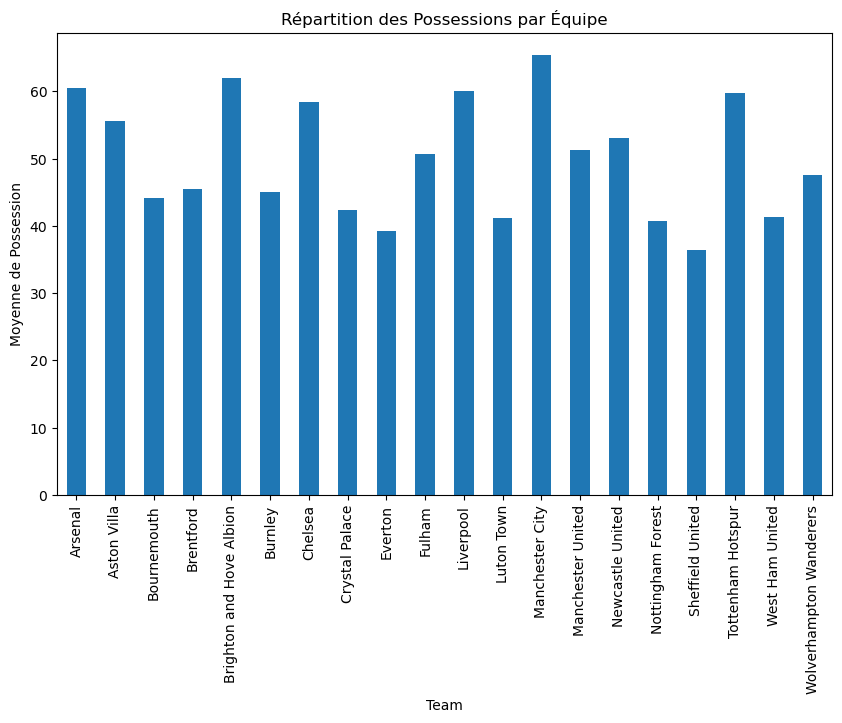

In [77]:
import matplotlib.pyplot as plt

result.groupby('Team')['Poss'].mean().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Moyenne de Possession')
plt.title('Répartition des Possessions par Équipe')
plt.show()

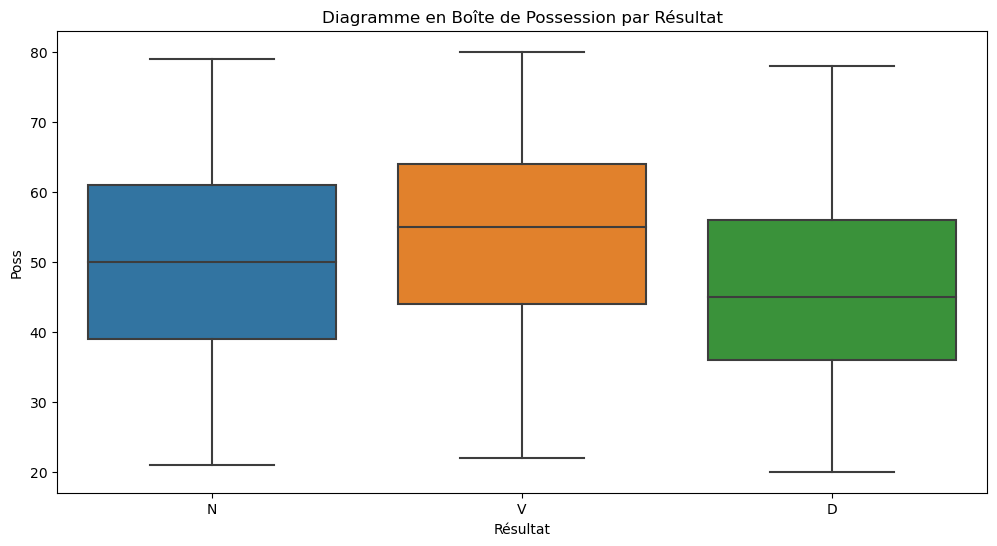

In [81]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Résultat', y='Poss', data=result)
plt.title('Diagramme en Boîte de Possession par Résultat')
plt.show()


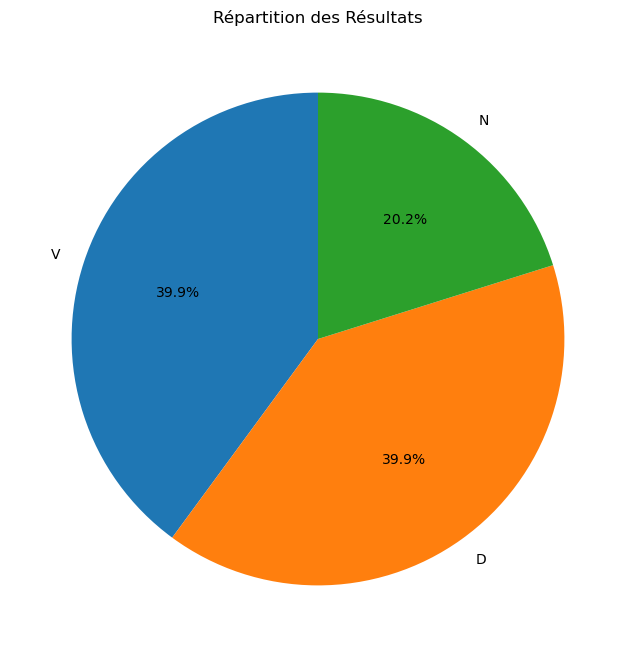

In [82]:
result_distribution = result['Résultat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(result_distribution, labels=result_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des Résultats')
plt.show()


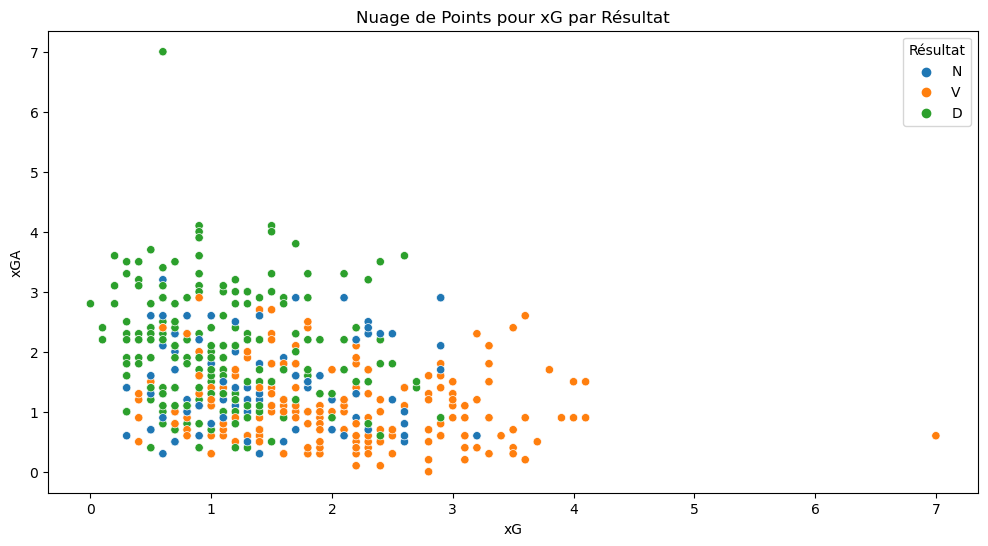

In [84]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='xG', y='xGA', hue='Résultat', data=result)
plt.title('Nuage de Points pour xG par Résultat')
plt.show()
